In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load files into a pandas dataframe
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')
ss = pd.read_csv('./data/SampleSubmission.csv')

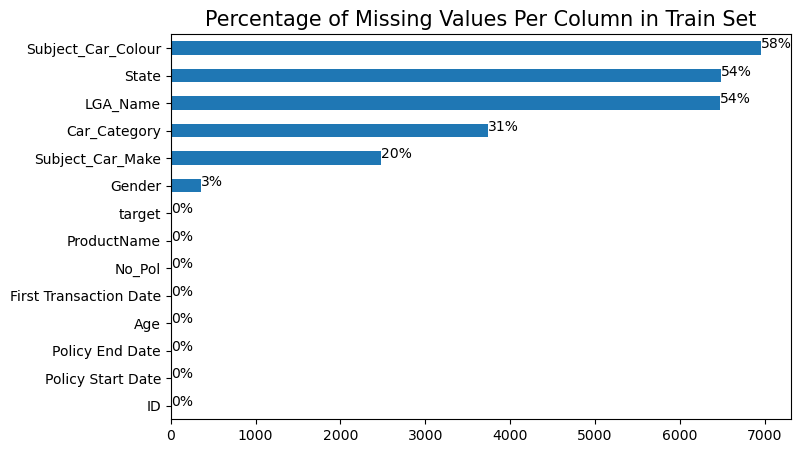

In [5]:
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (8, 5))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [6]:
mapper = {'Entity':'Other', 'Joint Gender':'Other', 'NOT STATED':'Other', 'NO GENDER': 'Other', 'SEX':"Other"}
train.Gender = train.Gender.replace(mapper)

In [8]:
train['Policy_Start_Date'] = pd.to_datetime(train['Policy_Start_Date'])
train['Policy_End_Date'] = pd.to_datetime(train['Policy_End_Date'])
train['First_Transaction_Date'] = pd.to_datetime(train['First_Transaction_Date'])

train['StartMonth'] = train['Policy_Start_Date'].dt.month
train['EndMonth'] = train['Policy_End_Date'].dt.month
train['FirstMonth'] = train['First_Transaction_Date'].dt.month

train['StartDay'] = train['Policy_Start_Date'].dt.day
train['EndDay'] = train['Policy_End_Date'].dt.day
train['FirstDay'] = train['First_Transaction_Date'].dt.day

KeyError: 'Policy_Start_Date'

In [ ]:
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,5,5,5,14,13,14
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1,11,11,11,29,28,29
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0,3,3,3,21,20,21
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,8,8,8,21,20,21
4,ID_00BRP63,2010-08-29,2010-12-31,Other,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1,8,12,8,29,31,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1,5,5,5,25,24,25
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0,10,10,10,3,2,3
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,10,10,10,10,8,10
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,Unknown,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0,2,2,2,27,26,27


In [ ]:
train = train.sort_values(by='Policy_Start_Date')
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay
8010,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37,2001-12-11,1,Saloon,Black,Honda,NaN,NaN,Car Vintage,0,12,12,12,11,10,11
10526,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37,2002-03-25,1,Saloon,Black,TOYOTA,Ekiti,Benue,Car Classic,0,3,3,3,25,24,25
10234,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41,2003-04-13,2,Saloon,Black,TOYOTA,Ikeja,Lagos,Car Vintage,0,4,4,4,13,12,13
12066,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48,2003-12-21,2,Saloon,NaN,BMW,NaN,NaN,Car Vintage,0,12,5,12,21,20,21
8124,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44,2005-08-05,1,NaN,NaN,Tata,Ajah,Lagos,CVTP,0,8,9,8,5,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,ID_MLGO8DZ,2010-12-31,2011-06-30,Male,51,2010-12-31,4,Saloon,Black,Honda,Victoria Island,Lagos,Car Classic,0,12,6,12,31,30,31
1997,ID_62LBOWI,2010-12-31,2011-12-30,Male,44,2010-12-31,1,NaN,NaN,NaN,Victoria Island,Lagos,Car Classic,0,12,12,12,31,30,31
11299,ID_XR8F115,2010-12-31,2011-12-30,Male,37,2010-12-31,1,JEEP,NaN,Hyundai,NaN,NaN,CarSafe,0,12,12,12,31,30,31
2919,ID_8P2UGYO,2010-12-31,2011-12-30,Male,20,2010-12-31,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,12,12,12,31,30,31


In [ ]:
def backfill_data(data, columns):
    for column in columns:
        data[column] = data[column].fillna(method='bfill')
    return data

backfill_columns = ['Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State']
    
backfilled_data = backfill_data(train, backfill_columns)

print("Original Data:")
print(train)
print("\nBackfilled Data:")
print(backfilled_data)
backfilled_data.to_csv('backfilled_data.csv', index=False)


Original Data:
               ID Policy_Start_Date Policy_End_Date  Gender  Age  \
8010   ID_O51ZQ1B        2001-12-11      2011-12-10  Female   37   
10526  ID_VJ1FAVO        2002-03-25      2011-03-24    Male   37   
10234  ID_ULWS8VL        2003-04-13      2011-04-12    Male   41   
12066  ID_ZYKGSP7        2003-12-21      2034-05-20    Male   48   
8124   ID_OEWBKGF        2005-08-05      2011-09-29  Female   44   
...           ...               ...             ...     ...  ...   
7479   ID_MLGO8DZ        2010-12-31      2011-06-30    Male   51   
1997   ID_62LBOWI        2010-12-31      2011-12-30    Male   44   
11299  ID_XR8F115        2010-12-31      2011-12-30    Male   37   
2919   ID_8P2UGYO        2010-12-31      2011-12-30    Male   20   
2886   ID_8MNXRC6        2010-12-31      2011-12-16    Male   36   

      First_Transaction_Date  No_Pol Car_Category Subject_Car_Colour  \
8010              2001-12-11       1       Saloon              Black   
10526             2002-0

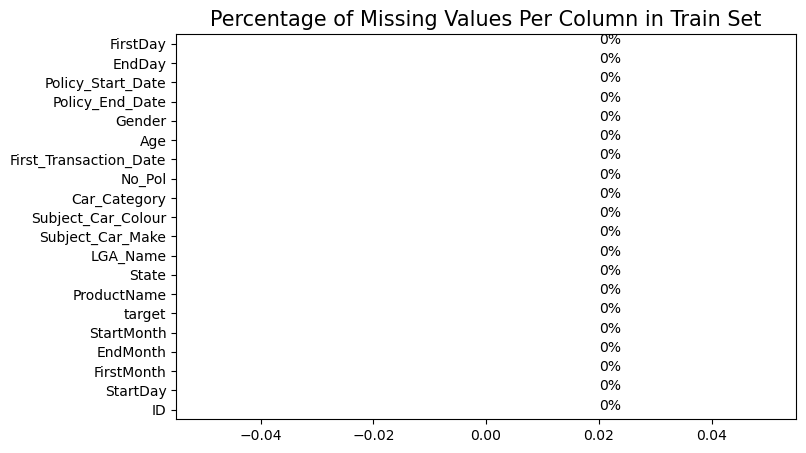

In [ ]:
# Check if there any missing values in train set
ax = backfilled_data.isna().sum().sort_values().plot(kind = 'barh', figsize = (8, 5))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/backfilled_data.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

# Excess Code

In [ ]:
# train['Gender_encoded'] = LabelEncoder().fit_transform(train['Gender'])
# train['Product_encoded'] = LabelEncoder().fit_transform(train['ProductName'])

In [ ]:
train_data = train[train['Car_Category'].notnull()]
missing_data = train[train['Car_Category'].isnull()]

label_encoder = LabelEncoder()
train_data['Car_Category_encoded'] = label_encoder.fit_transform(train_data['Car_Category'])

x_train = train_data[['StartMonth', 'EndMonth', 'FirstMonth']]
y_train = train_data['Car_Category_encoded']
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=7)

In [ ]:
train_data

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,...,Policy Start Date,Policy End Date,First Transaction Date,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay,Car_Category_encoded
0,ID_0040R73,14 May 2010,13 May 2011,Male,30,14 May 2010,1,Saloon,Black,TOYOTA,...,2010-05-14,2011-05-13,2010-05-14,5,5,5,14,13,14,8
1,ID_0046BNK,29 November 2010,28 November 2011,Female,79,29 November 2010,1,JEEP,Grey,TOYOTA,...,2010-11-29,2011-11-28,2010-11-29,11,11,11,29,28,29,2
2,ID_005QMC3,21 March 2010,20 March 2011,Male,43,21 March 2010,1,Saloon,Red,TOYOTA,...,2010-03-21,2011-03-20,2010-03-21,3,3,3,21,20,21,8
7,ID_00M1X6U,12 September 2010,11 September 2011,Male,43,12 September 2010,1,Saloon,NaN,TOYOTA,...,2010-09-12,2011-09-11,2010-09-12,9,9,9,12,11,12,8
8,ID_00N7XT1,06 July 2010,05 July 2011,Female,71,06 July 2010,2,JEEP,Black,REXTON,...,2010-07-06,2011-07-05,2010-07-06,7,7,7,6,5,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12069,ID_ZYMVRIU,23 May 2010,22 May 2011,Male,58,23 May 2010,1,Saloon,Black,TOYOTA,...,2010-05-23,2011-05-22,2010-05-23,5,5,5,23,22,23,8
12070,ID_ZYYEGH8,10 July 2010,20 April 2011,Male,38,10 July 2010,2,Saloon,NaN,TOYOTA,...,2010-07-10,2011-04-20,2010-07-10,7,4,7,10,20,10,8
12071,ID_ZZ0TC4R,09 April 2010,08 April 2011,Male,70,09 April 2010,3,Saloon,NaN,Kia,...,2010-04-09,2011-04-08,2010-04-09,4,4,4,9,8,9,8
12073,ID_ZZ5JOXU,08 August 2010,07 August 2011,Female,31,08 August 2010,1,Saloon,Cream,Hyundai,...,2010-08-08,2011-08-07,2010-08-08,8,8,8,8,7,8,8


In [ ]:
x_train

,StartMonth,EndMonth,FirstMonth
6900,6,6,6
990,1,1,1
10570,8,8,8
7455,9,9,9
2622,2,2,2
...,...,...,...
2010,1,1,1
1379,7,7,7
6221,6,6,6
8257,5,5,5


In [ ]:
missing_data = missing_data[['StartMonth','EndMonth','FirstMonth']]
missing_data

,StartMonth,EndMonth,FirstMonth
3,8,8,8
4,8,12,8
5,10,10,10
6,8,8,8
9,12,12,12
...,...,...,...
12072,9,9,9
12074,5,5,5
12075,10,10,10
12076,10,10,10


In [ ]:
y_train

6900     8
990      8
10570    8
7455     2
2622     8
        ..
2010     8
1379     8
6221     8
8257     2
801      2
Name: Car_Category_encoded, Length: 5838, dtype: int64

In [ ]:
y_train = pd.DataFrame(y_train, columns=['Car_Category_encoded'])

In [ ]:
y_train

,Car_Category_encoded
6900,8
990,8
10570,8
7455,2
2622,8
...,...
2010,8
1379,8
6221,8
8257,2


In [ ]:
x_train

,StartMonth,EndMonth,FirstMonth
6900,6,6,6
990,1,1,1
10570,8,8,8
7455,9,9,9
2622,2,2,2
...,...,...,...
2010,1,1,1
1379,7,7,7
6221,6,6,6
8257,5,5,5


Correlation Matrix:
                      StartMonth  EndMonth  FirstMonth  Car_Category_encoded
StartMonth              1.000000  0.838733    1.000000             -0.068193
EndMonth                0.838733  1.000000    0.838733             -0.058198
FirstMonth              1.000000  0.838733    1.000000             -0.068193
Car_Category_encoded   -0.068193 -0.058198   -0.068193              1.000000


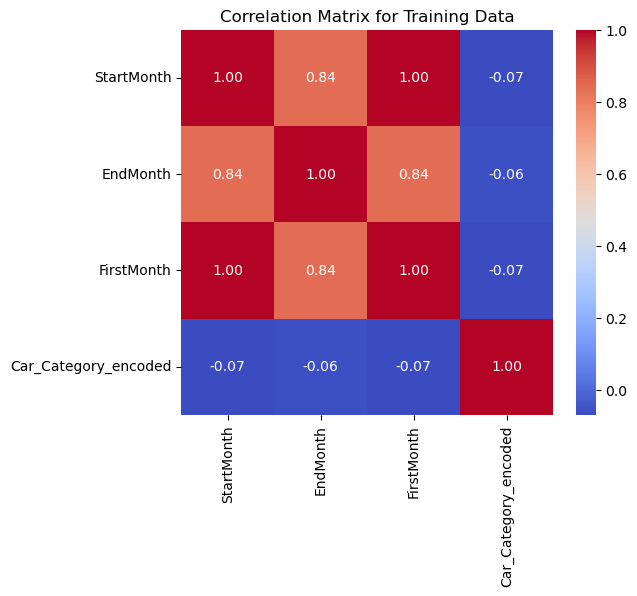

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix for Training Data
# Combine x_train and y_train into a single DataFrame for correlation calculation
train_data = pd.concat([x_train, y_train], axis=1)

# Compute the correlation matrix
correlation_matrix = train_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Training Data')
plt.show()

In [ ]:
model = DecisionTreeClassifier(random_state=10)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
x_test

,StartMonth,EndMonth,FirstMonth
10744,2,2,2
10680,9,9,9
1118,3,3,3
10382,2,2,2
11263,7,7,7
...,...,...,...
11806,2,2,2
3447,2,2,2
6547,6,6,6
9376,6,6,6


In [ ]:
y_pred = model.predict(missing_data)
y_pred

array([8, 8, 8, ..., 8, 8, 8])

In [ ]:
score = model.score(x_test, y_test)
score

0.7219336795844986

In [ ]:
y_test = pd.DataFrame(y_test, columns=['Car_Category_encoded'])
x_test = pd.DataFrame(x_test)

In [ ]:
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
x_test

,StartMonth,EndMonth,FirstMonth
0,2,2,2
1,9,9,9
2,3,3,3
3,2,2,2
4,7,7,7
...,...,...,...
2498,2,2,2
2499,2,2,2
2500,6,6,6
2501,6,6,6


In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['Car_Category_encoded'])
y_pred

,Car_Category_encoded
0,8
1,8
2,8
3,8
4,8
...,...
3733,8
3734,8
3735,8
3736,8


In [ ]:
encoded_values = y_pred['Car_Category_encoded']
original_categories = label_encoder.inverse_transform(encoded_values)

# Create a mapping DataFrame for reference
mapping_df = pd.DataFrame({'Encoded': encoded_values, 'Original': original_categories})
mapping_df


,Encoded,Original
0,8,Saloon
1,8,Saloon
2,8,Saloon
3,8,Saloon
4,8,Saloon
...,...,...
3733,8,Saloon
3734,8,Saloon
3735,8,Saloon
3736,8,Saloon


In [ ]:
original_categories = pd.DataFrame(original_categories, columns=['Car_Category'])
merged_results = pd.concat([missing_data, original_categories], axis=1)
merged_results = merged_results.dropna(subset=['StartMonth'])
merged_results

,StartMonth,EndMonth,FirstMonth,Car_Category
3,8.0,8.0,8.0,Saloon
4,8.0,12.0,8.0,Saloon
5,10.0,10.0,10.0,Saloon
6,8.0,8.0,8.0,Saloon
9,12.0,12.0,12.0,Saloon
...,...,...,...,...
12072,9.0,9.0,9.0,NaN
12074,5.0,5.0,5.0,NaN
12075,10.0,10.0,10.0,NaN
12076,10.0,10.0,10.0,NaN


In [ ]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [ ]:
merged_train = pd.concat([x_train, y_train], axis=1)
merged_train = merged_train.dropna(subset=['StartMonth'])
merged_train

,StartMonth,EndMonth,FirstMonth,Car_Category_encoded
0,6,6,6,8
1,1,1,1,8
2,8,8,8,8
3,9,9,9,2
4,2,2,2,8
...,...,...,...,...
5833,1,1,1,8
5834,7,7,7,8
5835,6,6,6,8
5836,5,5,5,2


In [ ]:
merged_test = pd.concat([x_test, y_test], axis=1)
merged_test = merged_test.dropna(subset=['StartMonth'])
merged_test

,StartMonth,EndMonth,FirstMonth,Car_Category_encoded
0,2,2,2,8
1,9,9,9,8
2,3,3,3,8
3,2,2,2,8
4,7,7,7,2
...,...,...,...,...
2498,2,2,2,2
2499,2,2,2,8
2500,6,6,6,8
2501,6,6,6,8


In [ ]:
original_categories

merged_results = merged_results.reset_index(drop=True)

train.update(merged_results, overwrite=True)

print(train.head())
train.to_csv('final_train2.csv')

           ID Policy_Start_Date   Policy_End_Date  Gender  Age  \
0  ID_0040R73       14 May 2010       13 May 2011    Male   30   
1  ID_0046BNK  29 November 2010  28 November 2011  Female   79   
2  ID_005QMC3     21 March 2010     20 March 2011    Male   43   
3  ID_0079OHW    21 August 2010    20 August 2011    Male    2   
4  ID_00BRP63    29 August 2010  31 December 2010   Other   20   

  First_Transaction_Date  No_Pol Car_Category Subject_Car_Colour  \
0            14 May 2010       1       Saloon              Black   
1       29 November 2010       1         JEEP               Grey   
2          21 March 2010       1       Saloon                Red   
3         21 August 2010       1          NaN                NaN   
4         29 August 2010       3          NaN                NaN   

  Subject_Car_Make  ... target Policy Start Date Policy End Date  \
0           TOYOTA  ...      0        2010-05-14      2011-05-13   
1           TOYOTA  ...      1        2010-11-29      2011